In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = "C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\train.csv"
def get_product_agg(cols):
    bimbo = pd.read_csv(filename, usecols = ['Semana', 'Producto_ID'] + cols, nrows=700000)
    agg = bimbo.groupby(['Semana', 'Producto_ID'], as_index=False).agg(['count', 'sum', 'min', 'max', 'median', 'mean'])
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
    del(bimbo)
    return agg


In [5]:
#Aggregating Units returned and demand based on Semana(week) and Product ID and get all of the different calculations, such as:
#(count, sum, min, max, median, mean)
agg1 = get_product_agg(['Demanda_uni_equil', 'Dev_uni_proxima'])
agg1

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2169                  122   
       73                            5093                  359   
       108                              6                    0   
       141                            205                   48   
       145                             64                    2   
       160                             19                   21   
       163                             15                    0   
       183                             44                    3   
       202                            179                    0   
       205                             14                    0   
       214                              5                    0   
       303                           5465                  302   
       323                           4437                  102   
       325                           3345                   93   
       328                           3287                  101   
       357                            355                   51   
       632                             12                  110   
       634                              6                    0   
       635                             16                    0   
       641                            528                   20   
       693                           3188                   85   
       713                             15                    1   
       714                              2                    0   
       715                             11                    0   
       739                             10                    2   
       779                              1                    0   
       890                              1                    0   
       972                          12800                  788   
       1039                            97                    3   
       1064                         12811                  596   
...                                   ...                  ...   
       47336                          164                    1   
       47611                          101                    2   
       47612                           41                    5   
       47840                          481                  144   
       47886                           48                  492   
       48019                           17                    4   
       48029                            1                    0   
       48077                         4176                   34   
       48121                           10                   29   
       48125                            1                    0   
       48127                            6                   15   
       48345                           26                   20   
       48417                         2893                  173   
       48419                          189                   17   
       48421                          973                  159   
       48597                           23                   41   
       48689                           21                   62   
       48893                           20                    1   
       48912                           13                   13   
       48925                            6                    4   
       48996                           99                  219   
       49028                          100                  483   
       49185                           17                    0   
       49492                           20                   44   
       49781                            1                    0   
       49860                           30                   32   
       49986                           39                    1   
       49988                           36                  1

In [6]:
agg1.shape

(499, 12)

In [7]:
agg1.head()

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2169                  122   
       73                            5093                  359   
       108                              6                    0   
       141                            205                   48   
       145                             64                    2   

                    Dev_uni_proxima_min  Dev_uni_proxima_max  \
Semana Producto_ID                                             
3      72                             0                   10   
       73                             0                    4   
       108                            0                    0   
       141                            0                    4   
       145                            0                    1   

                    Dev_uni_proxima_median  Dev_uni_proxima_mean  \
Semana Producto_ID                                                 
3      72                              0.0              0.056247   
       73                              0.0              0.070489   
       108                             0.0              0.000000   
       141                             0.0              0.234146   
       145                             0.0              0.031250   

                    Demanda_uni_equil_count  Demanda_uni_equil_sum  \
Semana Producto_ID                                                   
3      72                              2169                  11526   
       73                              5093                  10604   
       108                                6                    656   
       141                              205                    856   
       145                               64                    939   

                    Demanda_uni_equil_min  Demanda_uni_equil_max  \
Semana Producto_ID                                                 
3      72                               0                     46   
       73                               0                     39   
       108                             16                    280   
       141                              0                     77   
       145                              0                    115   

                    Demanda_uni_equil_median  Demanda_uni_equil_mean  
Semana Producto_ID                                                    
3      72                                4.0                5.313970  
       73                                2.0                2.082073  
       108                              32.0              109.333333  
       141                               2.0                4.175610  
       145                               3.0               14.671875

In [8]:
agg2 = get_product_agg(['Venta_uni_hoy'])
agg = agg1.join(agg2)
agg

Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      72                            2169                  122   
       73                            5093                  359   
       108                              6                    0   
       141                            205                   48   
       145                             64                    2   
       160                             19                   21   
       163                             15                    0   
       183                             44                    3   
       202                            179                    0   
       205                             14                    0   
       214                              5                    0   
       303                           5465                  302   
       323                           4437                  102   
       325                           3345                   93   
       328                           3287                  101   
       357                            355                   51   
       632                             12                  110   
       634                              6                    0   
       635                             16                    0   
       641                            528                   20   
       693                           3188                   85   
       713                             15                    1   
       714                              2                    0   
       715                             11                    0   
       739                             10                    2   
       779                              1                    0   
       890                              1                    0   
       972                          12800                  788   
       1039                            97                    3   
       1064                         12811                  596   
...                                   ...                  ...   
       47336                          164                    1   
       47611                          101                    2   
       47612                           41                    5   
       47840                          481                  144   
       47886                           48                  492   
       48019                           17                    4   
       48029                            1                    0   
       48077                         4176                   34   
       48121                           10                   29   
       48125                            1                    0   
       48127                            6                   15   
       48345                           26                   20   
       48417                         2893                  173   
       48419                          189                   17   
       48421                          973                  159   
       48597                           23                   41   
       48689                           21                   62   
       48893                           20                    1   
       48912                           13                   13   
       48925                            6                    4   
       48996                           99                  219   
       49028                          100                  483   
       49185                           17                    0   
       49492                           20                   44   
       49781                            1                    0   
       49860                           30                   32   
       49986                           39                    1   
       49988                           36                  1

In [11]:
products  =  pd.read_csv("C:\\Users\\richter Belmont\\Desktop\\Data Science - Projects\\Grupo Bimbo - Inventory Demand\\producto_tabla.csv")
products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)
w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})
products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ', expand=False).astype('float')
products.head()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


In [12]:
#Creating a data frame to find out what are the most demanded products
df = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
     groupby('short_name')['Demanda_uni_equil_sum'].sum().sort_values(ascending=False))

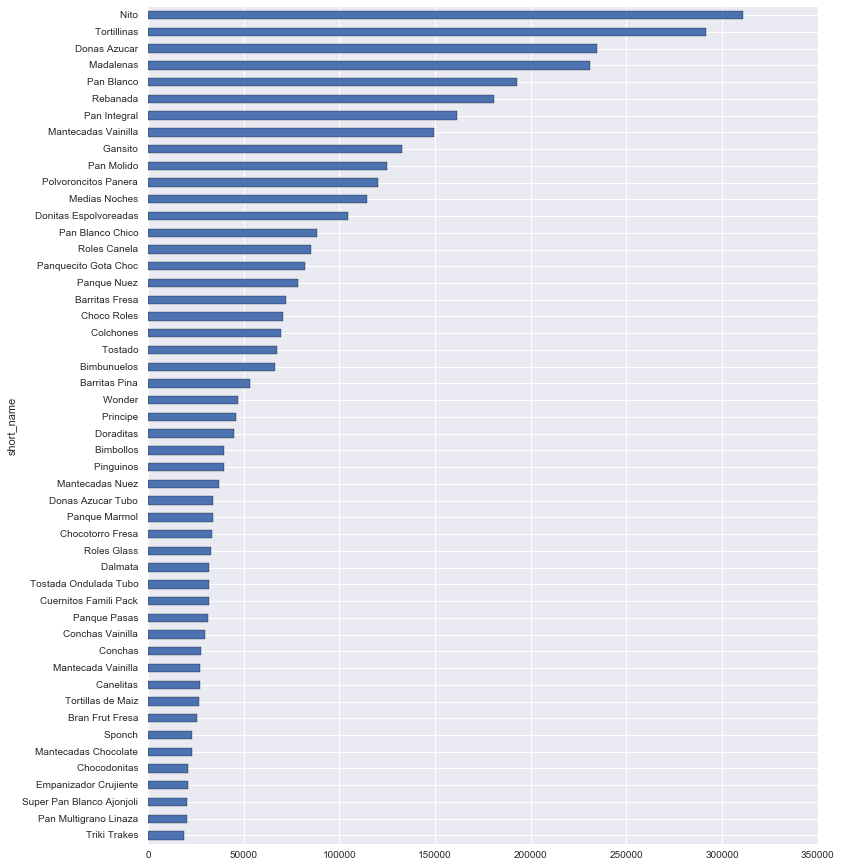

In [13]:
# Plotting the most demanded products
plt.figure(figsize=(12,15))
df.head(50).sort_values().plot(kind='barh')